In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np


# Load dataset
df = pd.read_csv("netflix_movies_series_final.csv")

Correlation Matrix
We'll compute Pearson and Spearman correlations.

In [5]:
print(df.columns)

Index(['Movie Name', 'IMDB Rating', 'Budget (Million $)',
       'Revenue (Million $)', 'Avg User Watch Time (Minutes)', 'Type'],
      dtype='object')


In [6]:
# Selecting numerical columns
cols = ['Budget (Million $)', 'Revenue (Million $)', 'IMDB Rating', 'Avg User Watch Time (Minutes)']

# Drop missing values in selected columns
df_corr = df[cols].dropna()

# Pearson Correlation Matrix
pearson_corr = df_corr.corr(method='pearson')
print(" Pearson Correlation Matrix:")
print(pearson_corr)

# Spearman Correlation Matrix
spearman_corr = df_corr.corr(method='spearman')
print("\n📌 Spearman Correlation Matrix:")
print(spearman_corr)


 Pearson Correlation Matrix:
                               Budget (Million $)  Revenue (Million $)  \
Budget (Million $)                       1.000000             0.725798   
Revenue (Million $)                      0.725798             1.000000   
IMDB Rating                             -0.015380            -0.011644   
Avg User Watch Time (Minutes)           -0.001192             0.000926   

                               IMDB Rating  Avg User Watch Time (Minutes)  
Budget (Million $)               -0.015380                      -0.001192  
Revenue (Million $)              -0.011644                       0.000926  
IMDB Rating                       1.000000                       0.002893  
Avg User Watch Time (Minutes)     0.002893                       1.000000  

📌 Spearman Correlation Matrix:
                               Budget (Million $)  Revenue (Million $)  \
Budget (Million $)                       1.000000             0.763237   
Revenue (Million $)                     

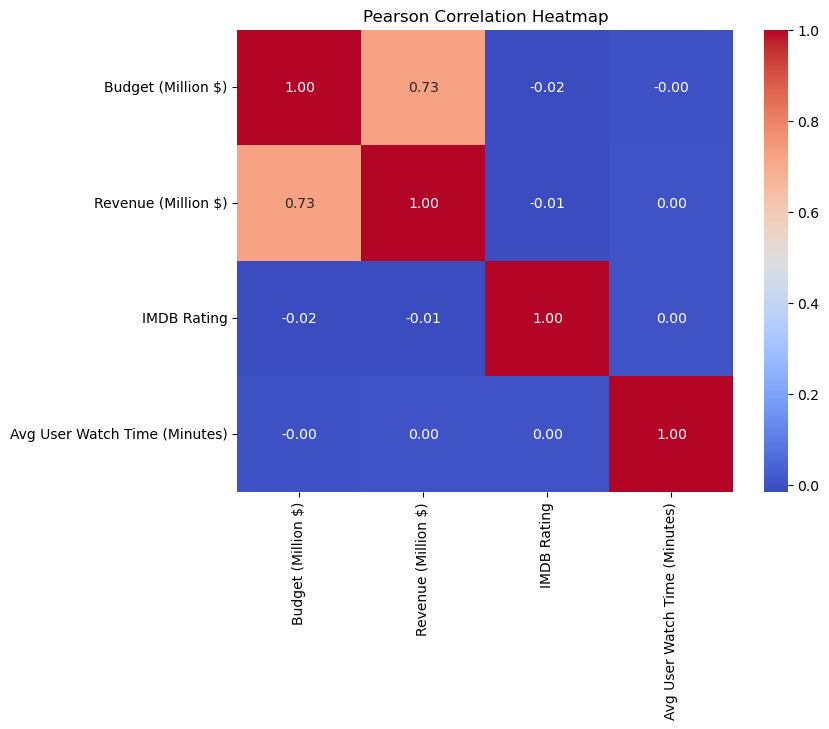

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()


Regression Analysis

In [21]:
import statsmodels.api as sm

# Clean data
reg_df = df[['Budget (Million $)', 'Revenue (Million $)']].dropna()

# Independent (X) and dependent (Y) variables
X = reg_df['Budget (Million $)']
y = reg_df['Revenue (Million $)']

# Add constant to X (for intercept)
X = sm.add_constant(X)

# Build and fit the model
model = sm.OLS(y, X).fit()

# Summary
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Revenue (Million $)   R-squared:                       0.527
Model:                             OLS   Adj. R-squared:                  0.527
Method:                  Least Squares   F-statistic:                 2.226e+04
Date:                 Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                         18:31:04   Log-Likelihood:            -1.3667e+05
No. Observations:                20000   AIC:                         2.733e+05
Df Residuals:                    19998   BIC:                         2.734e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.5